# World Happiness Report Data Cleaning and Analysis with Aggregation

In this project I will work with the World Happiness Report, an annual report created by the UN Sustainable Development Solutions Network with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10. Data analysis will focus on answering questions such as:

- How can aggregating the data give us more insight into happiness scores?
- How did world happiness change from 2015 to 2017?
- Which factors contribute the most to the happiness score?



In [234]:
import pandas as pd
import numpy as np
# read the World_Happiness_2015.csv file into a dataframe
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
print(happiness2015.info())
first_5 = happiness2015.iloc[:5,:]
print(first_5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
None
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2   

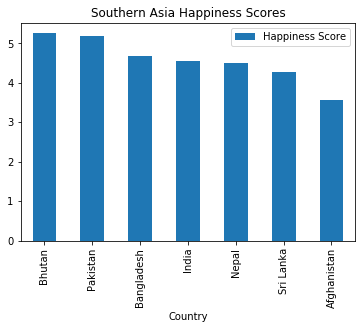

In [235]:
# Let's visualize happiness for a region and see how the data looks for south asia
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='bar', title='Southern Asia Happiness Scores', xlim=(0,10))

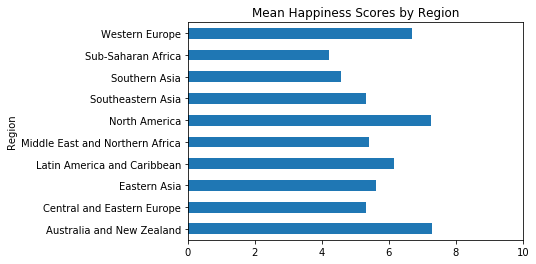

In [236]:
# reate a visualization that uses a summary statistic (mean value) to summarize the data for each region
agg_region_2015 = (happiness2015.groupby(["Region"]).mean()).reset_index()
agg_region_2015.plot(x='Region', y='Happiness Score', kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

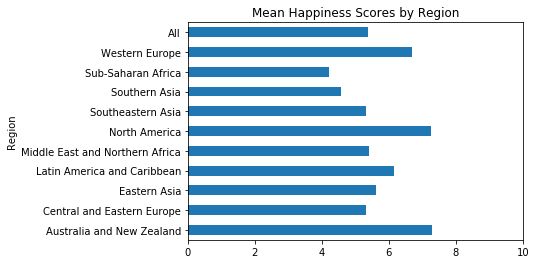

In [237]:
# we can use the df.pivot_table() method to more intuitively perform the same aggregation as above.
# As a user of MS Excel, this is also easier to comprehend
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

Note the difference above with the inclusion of the statistics for "All". When the margins parameter is set to be equal to True, All will be added to the index of the resulting dataframe and the corresponding value will be the result of applying the aggregation method to the entire column. This is very helpful during analysis and I prefer that. This method also allows us to aggregate multiple columns and apply multiple functions at once.

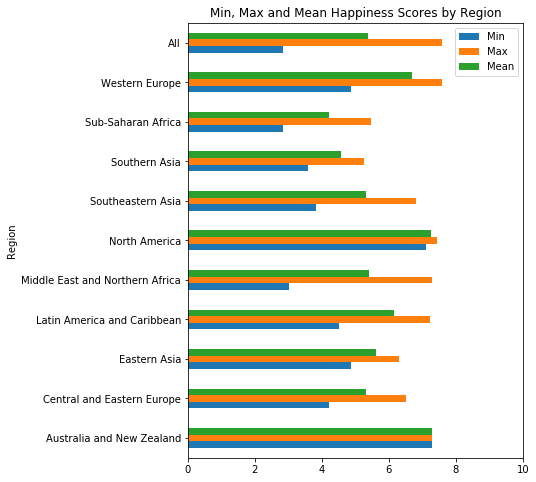

In [238]:
# calculate the the minimum, maximum, and mean for the entire Happiness Score column
pv_happy_family_stats = happiness2015.pivot_table(values=["Happiness Score"], index="Region", aggfunc=[np.min, np.max, np.mean], margins=True)
ax = pv_happy_family_stats.plot.barh(figsize=(6,8), title="Min, Max and Mean Happiness Scores by Region", xlim=(0,10))
ax.legend(["Min", "Max", "Mean"])


# Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

Let's analyze the 2015, 2016, and 2017 reports and look for trends to help answer this and other questions by reading the 2015, 2016, and 2017 reports into a pandas dataframe and adding a Year column to each to make it easier to distinguish between them

In [239]:
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")
# Add a column called Year to each dataframe with the corresponding year
happiness2015["Year"] = 2015
happiness2016["Year"] = 2016
happiness2017["Year"] = 2017
print(happiness2017.head(3))

   Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0   Norway               1            7.537      7.594445     7.479556   
1  Denmark               2            7.522      7.581728     7.462272   
2  Iceland               3            7.504      7.622030     7.385970   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  Year  
0    0.362012                       0.315964           2.277027  2017  
1    0.355280                       0.400770           2.313707  2017  
2    0.475540                       0.153527           2.322715  2017  


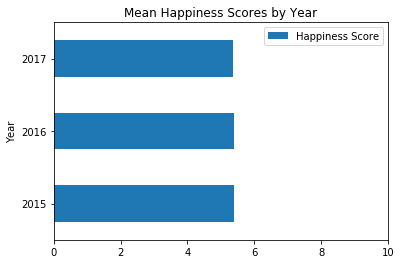

In [240]:
# Rename the Happiness.Score column to Happiness Score
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
# combine the data from the three years into one dataframe
combined = pd.concat([happiness2015, happiness2016, happiness2017], sort=False)
# create a pivot table from the combined dataframe
pivot_table_combined = combined.pivot_table(values="Happiness Score", index="Year")
# create a bar chart of the results
pivot_table_combined.plot(kind="barh", title="Mean Happiness Scores by Year", xlim=(0,10))

In [241]:
print(pivot_table_combined)

      Happiness Score
Year                 
2015         5.375734
2016         5.382185
2017         5.354019


Based on the results above, it appears that world happiness stayed about the same from 2015 to 2017!

## Factors That Contribute To Happiness

We can continue working with the World Happiness Report and explore another aspect of it that we haven't analyzed yet - the factors that contribute happiness. 

The columns listed below contain the estimated extent to which each particular factor contributes to the happiness score for the dataset:

- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity

Let's work with the data (starting with just the 2015 report) to see which of the factors above contribute the most to the happiness score?

In [242]:
# Let's start by renaming some of the columns in happiness2015
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }
happiness2015 = happiness2015.rename(mapping, axis=1)

We note that the sum of the six factors and the Dystopia Residual column equals the happiness score:

In [243]:
# Print out a few rows of the colums
(happiness2015[['Happiness Score','Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].head())

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [244]:
# Calculate the sum of the factor columns in each row.
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].sum(axis=1)

# Display the first five rows of the result and the Happiness Score column.
happiness2015[['Happiness Score', 'Factors Sum']].head()

,Happiness Score,Factors Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694


In [245]:
# Let's apply a function element-wise to multiple columns of the dataset and see what impact they may be having
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity'] 
factors_impact = happiness2015[factors].applymap(label)

print(factors_impact.head(10))

  Economy Family Health Freedom Trust Generosity
0    High   High    Low     Low   Low        Low
1    High   High    Low     Low   Low        Low
2    High   High    Low     Low   Low        Low
3    High   High    Low     Low   Low        Low
4    High   High    Low     Low   Low        Low
5    High   High    Low     Low   Low        Low
6    High   High    Low     Low   Low        Low
7    High   High    Low     Low   Low        Low
8    High   High    Low     Low   Low        Low
9    High   High    Low     Low   Low        Low


We can see from the results that, according to our own definition, the Economy and Family columns had a high impact on the happiness scores, while the others seem to not have such a high impact. 

Now, we can calculate the number of 'High' and 'Low' values in each column of the result above.

In [246]:
print(factors_impact.apply(pd.value_counts))

      Economy  Family  Health  Freedom  Trust  Generosity
High       66      89       2      NaN    NaN         NaN
Low        92      69     156    158.0  158.0       158.0


Let's rework this result to get a dataframe containing the percentage of 'High' and 'Low' values in each column so we can compare the impact easily.

In [247]:
# calculate the percentage of 'High' and 'Low' values in each column
def v_counts (col):
    num = col.value_counts()
    den = col.size
    return num/den

# apply the v_counts function to all of the columns
v_counts_pct = factors_impact.apply(v_counts)
print(v_counts_pct)

       Economy    Family    Health  Freedom  Trust  Generosity
High  0.417722  0.563291  0.012658      NaN    NaN         NaN
Low   0.582278  0.436709  0.987342      1.0    1.0         1.0


In [248]:
# convert each of the values in the six factor columns and the Dystopia Residual column to percentages
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
def percentages (col):
    div = col/happiness2015["Happiness Score"]
    return (div * 100)

factor_percentages = happiness2015[factors].apply(percentages)
factor_percentages.head()

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445


The output above shows the individual breakdown percentages but is hard to visualize or review. Let's reshape our data and used vectorized methods instead of element by element application of a function using df.apply

In [249]:
# reshape our data so that we could use vectorized operations to convert the value column into percentage

melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

melt.head()

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86


Now we can create a better views with a pivot table and a pie chart

None


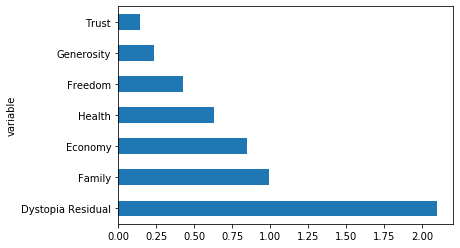

In [250]:
melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

# Create a pivot table from the melt dataframe
pv_melt = melt.pivot_table(index="variable", values="value")

print(pv_melt.sort_values("value", ascending=False, inplace=True))

# Create a bar chart of the results
pv_melt.plot(kind="barh", y="value", legend=False)

If we disregard Dystopia Residual, Economy and Family are two prominent factors that, on average, contribute the most to the happiness score.

In [251]:
# Let's "un-melt" the data, and transform rows into columns
unmelt = melt.pivot(index="Country",columns="variable", values="value")
unmelt.head(25)

variable,Dystopia Residual,Economy,Family,Freedom,Generosity,Health,Trust
Country,,,,,,,
Afghanistan,1.95210,0.31982,0.30285,0.23414,0.36510,0.30335,0.09719
Albania,1.89894,0.87867,0.80434,0.35733,0.14272,0.81325,0.06413
Algeria,2.43209,0.93929,1.07772,0.28579,0.07822,0.61766,0.17383
Angola,1.94939,0.75778,0.86040,0.10384,0.12344,0.16683,0.07122
Argentina,2.83600,1.05351,1.24823,0.44974,0.11451,0.78723,0.08484
Armenia,1.75873,0.76821,0.77711,0.19847,0.07855,0.72990,0.03900
Australia,2.26646,1.33358,1.30923,0.65124,0.43562,0.93156,0.35637
Austria,2.53320,1.33723,1.29704,0.62433,0.33088,0.89042,0.18676
Azerbaijan,2.00073,1.02389,0.93793,0.37030,0.07799,0.64045,0.16065


## Combining current dataset with more data
Let's continue working with the 2015 World Happiness Report and add additional economic data from the World Bank. let's read the data sets into pandas and combine them.

In [252]:
# read the data sets into pandas and combine them
world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

merged = happiness2015.merge(world_dev, how="left", left_on="Country", right_on="ShortName")
merged.rename(mapper=col_renaming, inplace=True, axis="columns")
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


Let's work with the CurrencyUnit column and extract the unit of currency without the leading nationality.

In [253]:
merged['Currency Vectorized']=(merged["CurrencyUnit"].str.split()).str.get(-1)
merged["Currency Vectorized"].head

<bound method NDFrame.head of 0       franc
1       krona
2       krone
3       krone
4      dollar
        ...  
153     franc
154     franc
155       NaN
156     franc
157     franc
Name: Currency Vectorized, Length: 158, dtype: object>

Let's see how many use dollars, francs, pesos, etc.

In [254]:
merged["Currency Vectorized"].value_counts().head()

Euro      20
franc     16
dollar    12
dinar      8
peso       7
Name: Currency Vectorized, dtype: int64

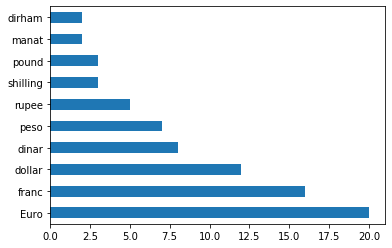

In [255]:
# Create a bar chart of the results for top 10 currency names
merged["Currency Vectorized"].value_counts().head(10).plot(kind="barh", y="value", legend=False)

The Rupee seems to be a currency name in five of the countries in the list. India and Pakistan are known to use the Indian Rupee and Pakistani Rupee respectively. What other countries are using this currency and what is their happiness rank?

In [256]:
bool_rupee = merged["Currency Vectorized"] == "rupee"
print(merged.loc[bool_rupee,["Country", "Happiness Rank", "SpecialNotes"]])

       Country  Happiness Rank  \
70   Mauritius              71   
80    Pakistan              81   
116      India             117   
120      Nepal             121   
131  Sri Lanka             132   

                                          SpecialNotes  
70                                                 NaN  
80   Fiscal year end: June 30; reporting period for...  
116  Fiscal year end: March 31; reporting period fo...  
120  Fiscal year end: July 14; reporting period for...  
131                                                NaN  


France and Belgium used to use the franc but surely they now use the Euro. How then are there 16 countries using currencies named "franc" and where do they rank in terms of Happiness Rank?

In [257]:
bool_franc = merged["Currency Vectorized"] == "franc"
print(merged.loc[bool_franc,["Country", "Happiness Rank", "Region_x"]])

                      Country  Happiness Rank            Region_x
0                 Switzerland               1      Western Europe
125                  Djibouti             126  Sub-Saharan Africa
132                  Cameroon             133  Sub-Saharan Africa
137                      Mali             138  Sub-Saharan Africa
139                   Comoros             140  Sub-Saharan Africa
141                   Senegal             142  Sub-Saharan Africa
142                     Gabon             143  Sub-Saharan Africa
143                     Niger             144  Sub-Saharan Africa
147  Central African Republic             148  Sub-Saharan Africa
148                      Chad             149  Sub-Saharan Africa
149                    Guinea             150  Sub-Saharan Africa
151              Burkina Faso             152  Sub-Saharan Africa
153                    Rwanda             154  Sub-Saharan Africa
154                     Benin             155  Sub-Saharan Africa
156       

Switzerland seems to be the only country that is doing well (really well as it's #1 in this report). The other countries are all from Sub-Saharan Africa, and presumably adopted the name "franc" as their currency as they were former colonies of Belgium or France.

Lastly, let's look at the almighty dollar!

In [258]:
bool_dollar = merged["Currency Vectorized"] == "dollar"
print(merged.loc[bool_dollar,["Country", "Happiness Rank"]])

                 Country  Happiness Rank
4                 Canada               5
8            New Zealand               9
9              Australia              10
14         United States              15
23             Singapore              24
39              Suriname              40
40   Trinidad and Tobago              41
41           El Salvador              42
47               Ecuador              48
64               Jamaica              65
114             Zimbabwe             115
115              Liberia             116


Next, we'll group the data by the IncomeGroup column and plot the results. First, however, we would like to clean the values in the IncomeGroup column

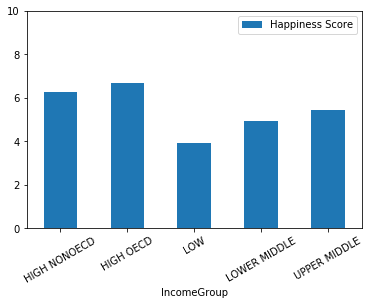

In [259]:
# clean the IncomeGroup column
cleaned_incomegroup = merged["IncomeGroup"].str.replace(" income", "")
cleaned_incomegroup = cleaned_incomegroup.str.replace(":", "")
cleaned_incomegroup = cleaned_incomegroup.str.upper()
merged["IncomeGroup"] = cleaned_incomegroup
# Get pivot table with the mean of each income group in the IncomeGroup column
pv_incomes = merged.pivot_table(index="IncomeGroup", values="Happiness Score")
# Bar plot and rotate the label by 30 degrees
pv_incomes.plot(kind="bar", rot=30, ylim=(0,10))

## More Data Cleaning

Let's combine the 2015, 2016, and 2017 World Happiness Reports and clean missing values. Let's start by gathering information about the dataframes.

In [260]:
happiness2015 = pd.read_csv("wh_2015.csv")
happiness2016 = pd.read_csv("wh_2016.csv")
happiness2017 = pd.read_csv("wh_2017.csv")

shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape
print(shape_2015, shape_2016, shape_2017)

(164, 13) (164, 14) (164, 13)


Let's check for missing values before transforming data to make sure we don't unintentionally introduce missing values

In [261]:
missing_2015=happiness2015.isnull().sum()
missing_2016=happiness2016.isnull().sum()
missing_2017=happiness2017.isnull().sum()

print(missing_2015, '\n', missing_2016, '\n', missing_2017)

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64 
 Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64 
 Country                  

Let's clean and rename the columns to eliminate some of the problems with the missing data, using the following criteria to rename the columns:
- All letters should be uppercase.
- There should be only one space between words.
- There should be no parentheses in column names

In [262]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2015.columns = happiness2015.columns.str.replace(r'[\(\)]', '').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace(r'[\(\)]', '').str.strip().str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)
missing = combined.isnull().sum()

print(combined)

               COUNTRY  DYSTOPIA RESIDUAL  ECONOMY GDP PER CAPITA   FAMILY  \
0          Switzerland            2.51738                 1.39651  1.34951   
1              Iceland            2.70201                 1.30232  1.40223   
2              Denmark            2.49204                 1.32548  1.36058   
3               Norway            2.46531                 1.45900  1.33095   
4               Canada            2.45176                 1.32629  1.32261   
..                 ...                ...                     ...      ...   
487        Puerto Rico                NaN                     NaN      NaN   
488  Somaliland Region                NaN                     NaN      NaN   
489  Somaliland region                NaN                     NaN      NaN   
490           Suriname                NaN                     NaN      NaN   
491          Swaziland                NaN                     NaN      NaN   

     FREEDOM  GENEROSITY  HAPPINESS RANK  HAPPINESS SCORE  \
0 

In [263]:
print(missing)

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64


We can learn more about where these missing values are located by visualizing them with a heatmap, a graphical representation of our data in which values are represented as colors. We'll use the seaborn library to create the heatmap.

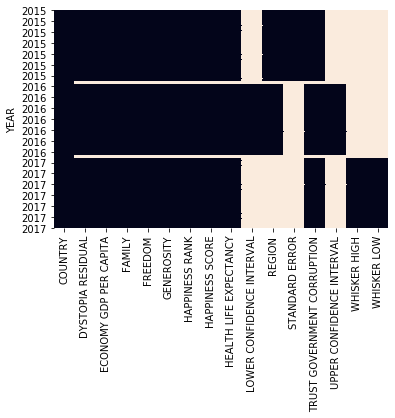

In [264]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)

We can observe the following:

- The COUNTRY column looks complete.
- There are a few rows in the 2015, 2016, and 2017 data with missing values in all columns EXCEPT the COUNTRY column.
- Some columns only have data populated for one year such as the column WHISKER LOW.
- Some columns have data for two years but may be missing some rows for that year, such as column REGION

It looks like the REGION data is missing for the year 2017. Let's check that in the sections below

In [265]:
print(happiness2017.columns)

Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'WHISKER HIGH',
       'WHISKER LOW', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'GENEROSITY',
       'TRUST GOVERNMENT CORRUPTION', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')


There doesn't appear to be any column in happiness2017 for REGION. Let's compute this in another way:

In [266]:
regions_2017 = combined.loc[combined["YEAR"]==2017,"REGION"]
missing = regions_2017.isnull().sum()
print(missing)

164


Clearly, all 164 region values are missing for the year 2017. Let's see if we can use data from additional sources to fill the missing values for REGION. Since the regions are fixed values - the region a country was assigned to in 2015 or 2016 won't change - we should be able to assign the 2015 or 2016 region to the 2017 row.

In [267]:
regions1 = combined.loc[combined["YEAR"]==2015,["COUNTRY","REGION"]]
print(regions1)

               COUNTRY          REGION
0          Switzerland  Western Europe
1              Iceland  Western Europe
2              Denmark  Western Europe
3               Norway  Western Europe
4               Canada   North America
..                 ...             ...
159            Namibia             NaN
160        Puerto Rico             NaN
161            Somalia             NaN
162  Somaliland Region             NaN
163        South Sudan             NaN

[164 rows x 2 columns]


In [268]:
print(regions1.isnull().sum())

COUNTRY    0
REGION     6
dtype: int64


In [269]:
regions2 = combined.loc[combined["YEAR"]==2016,["COUNTRY","REGION"]]
print(regions2)

               COUNTRY          REGION
164            Denmark  Western Europe
165        Switzerland  Western Europe
166            Iceland  Western Europe
167             Norway  Western Europe
168            Finland  Western Europe
..                 ...             ...
323            Lesotho             NaN
324         Mozambique             NaN
325               Oman             NaN
326  Somaliland region             NaN
327          Swaziland             NaN

[164 rows x 2 columns]


In [270]:
regions = pd.concat([regions1, regions2]).drop_duplicates().reset_index(drop=True)
print(regions)

               COUNTRY          REGION
0          Switzerland  Western Europe
1              Iceland  Western Europe
2              Denmark  Western Europe
3               Norway  Western Europe
4               Canada   North America
..                 ...             ...
172            Lesotho             NaN
173         Mozambique             NaN
174               Oman             NaN
175  Somaliland region             NaN
176          Swaziland             NaN

[177 rows x 2 columns]


In [271]:
regions = regions.dropna()

In the preceding steps I have created a dataframe named regions containing all of the countries and corresponding regions from the happiness2015 and happiness2016 dataframes. Now we can assign the 2015 or 2016 region to the 2017 row which has the missing region.

In [272]:
combined = pd.merge(left=combined, right=regions, on="COUNTRY", how="left")
combined = combined.drop("REGION_x", axis=1)

In [273]:
combined.rename(columns={"REGION_y":"REGION"}, inplace = True)
combined.head(10)

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,0.03411,0.41978,NaN,NaN,NaN,2015,Western Europe
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,0.04884,0.14145,NaN,NaN,NaN,2015,Western Europe
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,0.03328,0.48357,NaN,NaN,NaN,2015,Western Europe
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,0.03880,0.36503,NaN,NaN,NaN,2015,Western Europe
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,0.03553,0.32957,NaN,NaN,NaN,2015,North America
5,Finland,2.61955,1.29025,1.31826,0.64169,0.23351,6.0,7.406,0.88911,NaN,0.03140,0.41372,NaN,NaN,NaN,2015,Western Europe
6,Netherlands,2.46570,1.32944,1.28017,0.61576,0.47610,7.0,7.378,0.89284,NaN,0.02799,0.31814,NaN,NaN,NaN,2015,Western Europe
7,Sweden,2.37119,1.33171,1.28907,0.65980,0.36262,8.0,7.364,0.91087,NaN,0.03157,0.43844,NaN,NaN,NaN,2015,Western Europe
8,New Zealand,2.26425,1.25018,1.31967,0.63938,0.47501,9.0,7.286,0.90837,NaN,0.03371,0.42922,NaN,NaN,NaN,2015,Australia and New Zealand
9,Australia,2.26646,1.33358,1.30923,0.65124,0.43562,10.0,7.284,0.93156,NaN,0.04083,0.35637,NaN,NaN,NaN,2015,Australia and New Zealand


Let's now standardize the capitalization for the COUNTRY column and then check for any duplicates for the set of countries and years.

In [274]:
print(combined["COUNTRY"])

0            Switzerland
1                Iceland
2                Denmark
3                 Norway
4                 Canada
             ...        
487          Puerto Rico
488    Somaliland Region
489    Somaliland region
490             Suriname
491            Swaziland
Name: COUNTRY, Length: 492, dtype: object


In [276]:
combined["COUNTRY"] = combined["COUNTRY"].str.upper()
dups = combined.duplicated(["COUNTRY", "YEAR"])
print(combined.loc[dups,["COUNTRY", "YEAR", "HAPPINESS SCORE"]])

               COUNTRY  YEAR  HAPPINESS SCORE
162  SOMALILAND REGION  2015              NaN
326  SOMALILAND REGION  2016              NaN
489  SOMALILAND REGION  2017              NaN


So we actually do have three duplicate rows! Let's inspect all the rows for SOMALILAND REGION

In [277]:
print(combined[combined['COUNTRY'] == 'SOMALILAND REGION'])

               COUNTRY  DYSTOPIA RESIDUAL  ECONOMY GDP PER CAPITA   FAMILY  \
90   SOMALILAND REGION            2.11032                 0.18847  0.95152   
162  SOMALILAND REGION                NaN                     NaN      NaN   
260  SOMALILAND REGION            2.43801                 0.25558  0.75862   
326  SOMALILAND REGION                NaN                     NaN      NaN   
488  SOMALILAND REGION                NaN                     NaN      NaN   
489  SOMALILAND REGION                NaN                     NaN      NaN   

     FREEDOM  GENEROSITY  HAPPINESS RANK  HAPPINESS SCORE  \
90   0.46582     0.50318            91.0            5.057   
162      NaN         NaN             NaN              NaN   
260  0.39130     0.51479            97.0            5.057   
326      NaN         NaN             NaN              NaN   
488      NaN         NaN             NaN              NaN   
489      NaN         NaN             NaN              NaN   

     HEALTH LIFE EXPECTAN

We should definiely keep row 90 and 260. Maybe keep row 488 for the sake of completeness for year 2017. We can use the df.drop_duplicates() method to drop rows with more than one country for each year.

In [279]:
combined = combined.drop_duplicates(["COUNTRY", "YEAR"])
dups = combined.duplicated(["COUNTRY", "YEAR"])
print(combined.loc[dups,["COUNTRY", "YEAR", "HAPPINESS SCORE"]])

Empty DataFrame
Columns: [COUNTRY, YEAR, HAPPINESS SCORE]
Index: []


Now, let's confirm how many missing values are now left in the dataframe:

In [280]:
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               19
ECONOMY GDP PER CAPITA          19
FAMILY                          19
FREEDOM                         19
GENEROSITY                      19
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
HEALTH LIFE EXPECTANCY          19
LOWER CONFIDENCE INTERVAL      332
STANDARD ERROR                 331
TRUST GOVERNMENT CORRUPTION     19
UPPER CONFIDENCE INTERVAL      332
WHISKER HIGH                   334
WHISKER LOW                    334
YEAR                             0
REGION                           0
dtype: int64

Since missing values make up more than half of the following columns and we don't need them to accomplish our end goal of analyzing happiness scores and the associated causal factors, we'll drop these columns:

- STANDARD ERROR
- LOWER CONFIDENCE INTERVAL
- UPPER CONFIDENCE INTERVAL
- WHISKER HIGH
- WHISKER LOW

In [282]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']

combined = combined.drop(columns_to_drop, axis=1)
combined.isnull().sum()

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

We have now dropped some of the columns which didn't have much data, and these did not directly impact our analysis. The remaining columns do help create the happiness score so we need to see how we can further process the data to reduce loss of information. Will dropping missing values cause us to lose valuable information in other columns? It might be best to answer that question by visualizing the data again:

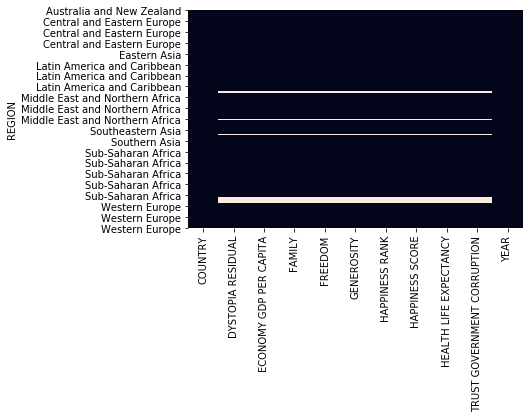

In [283]:
sorted = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False)

So, dropping the missing values will probably not result in the loss of valuable information in other columns, as if the data is missing in one column, it is missing in almost all the others (except COUNTRY and YEAR). Also, the Sub-Saharan Africa region contains the most missing values based on the thickness of the line above.

We could choose to replace the missing data for these columns with the mean or even the mean of the regions, if the other data needed to be preserved or was valuable. However, in this case, it's clearly better to drop the rows with missing values.

In [284]:
combined = combined.dropna()
missing = combined.isnull().sum()
print(missing)

COUNTRY                        0
DYSTOPIA RESIDUAL              0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
FREEDOM                        0
GENEROSITY                     0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
HEALTH LIFE EXPECTANCY         0
TRUST GOVERNMENT CORRUPTION    0
YEAR                           0
REGION                         0
dtype: int64
